# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
# Your Code Here

import chart_studio.plotly as py
import cufflinks as cf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
# your code here

fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

/var/folders/3b/jthsddxn1lq17vz466w1nbgw0000gn/T/ipykernel_1888/4168688422.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



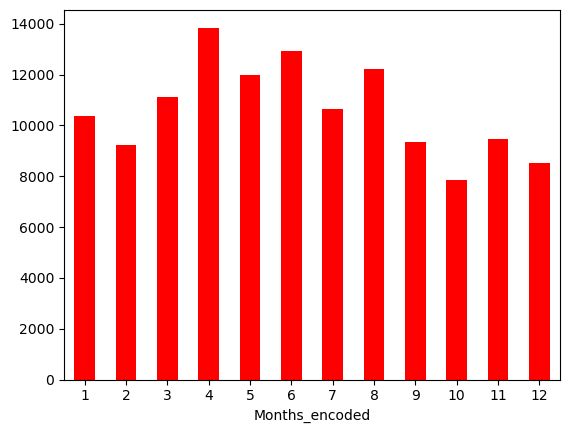

In [4]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

fitbit.describe().T
fitbit.groupby('Months_encoded').median()['Steps'].plot(kind = 'bar', color = 'r');
plt.xticks(rotation = 360);

/var/folders/3b/jthsddxn1lq17vz466w1nbgw0000gn/T/ipykernel_1888/2550999983.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



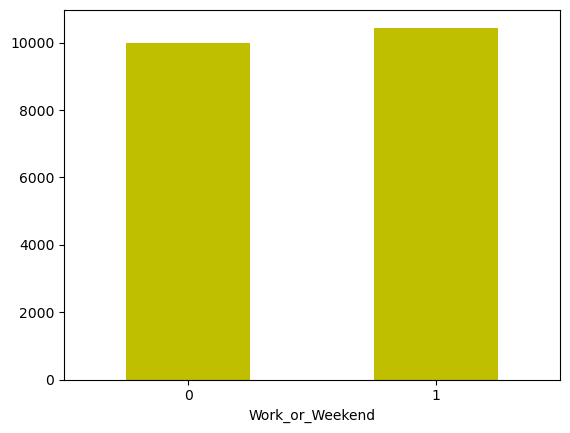

In [5]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here

fitbit.groupby('Work_or_Weekend').median()['Steps'].plot(kind = 'bar', color = 'y');
plt.xticks(rotation = 360);

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

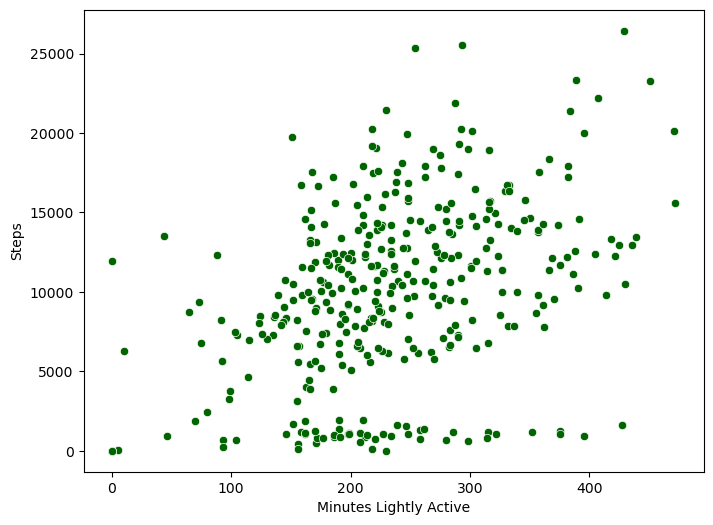

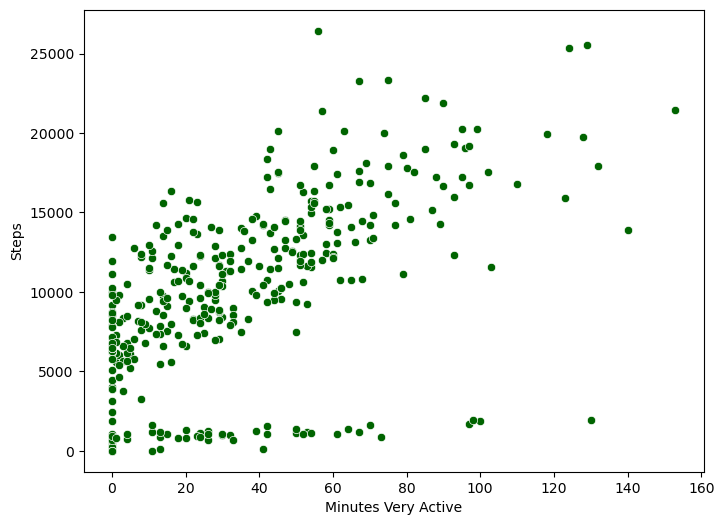

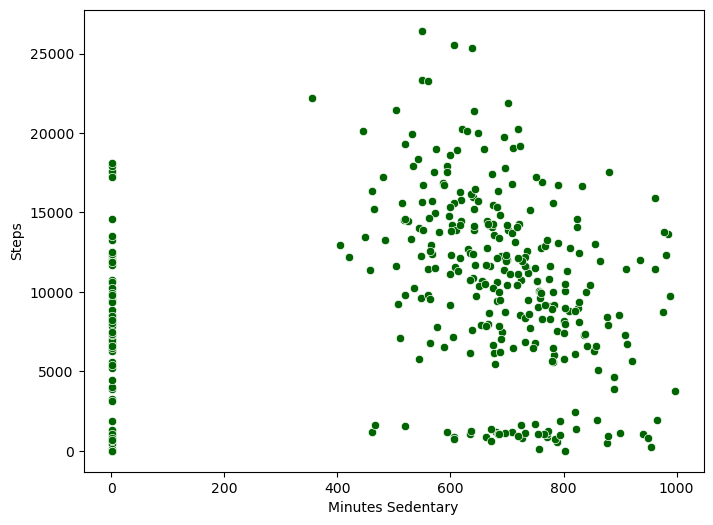

In [6]:
# your code here

columns = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
for e in columns: 
    plt.figure(figsize = (8,6))
    sns.scatterplot(data = fitbit,
                        x = e,
                        y = 'Steps',
                        color = 'DarkGreen')

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [7]:
# your code here

titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [8]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [9]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes('number').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [10]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes('object').head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [11]:
# your code here

sns.set(style = 'white')

plt.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

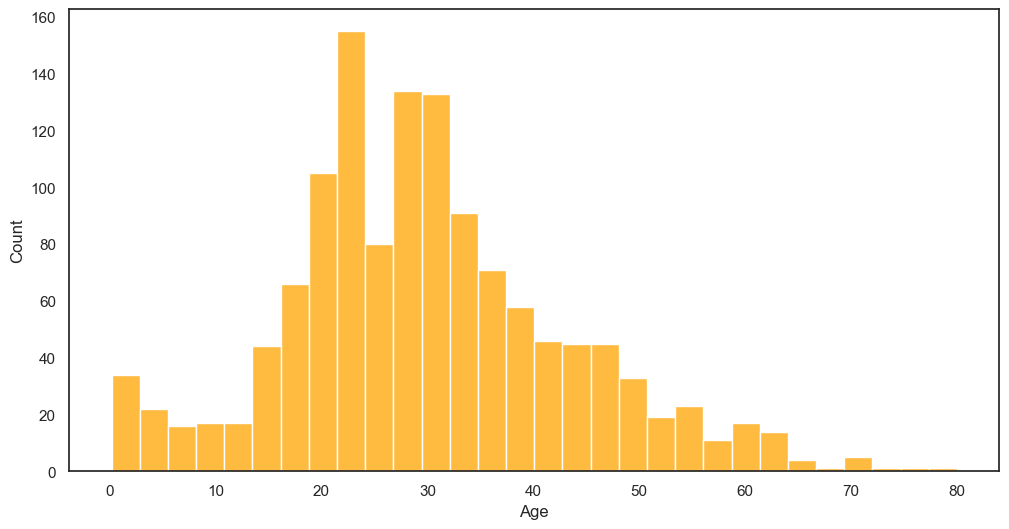

In [12]:
# your code here

sns.histplot(x = titanic.Age, color = 'orange');

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

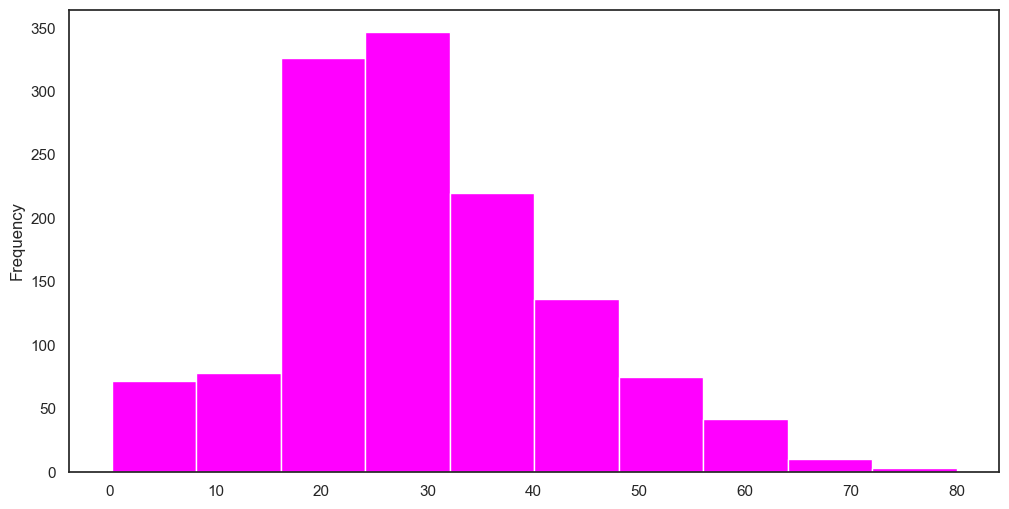

In [13]:
# your code here

titanic['Age'].plot.hist(bins = 10, color = 'magenta');

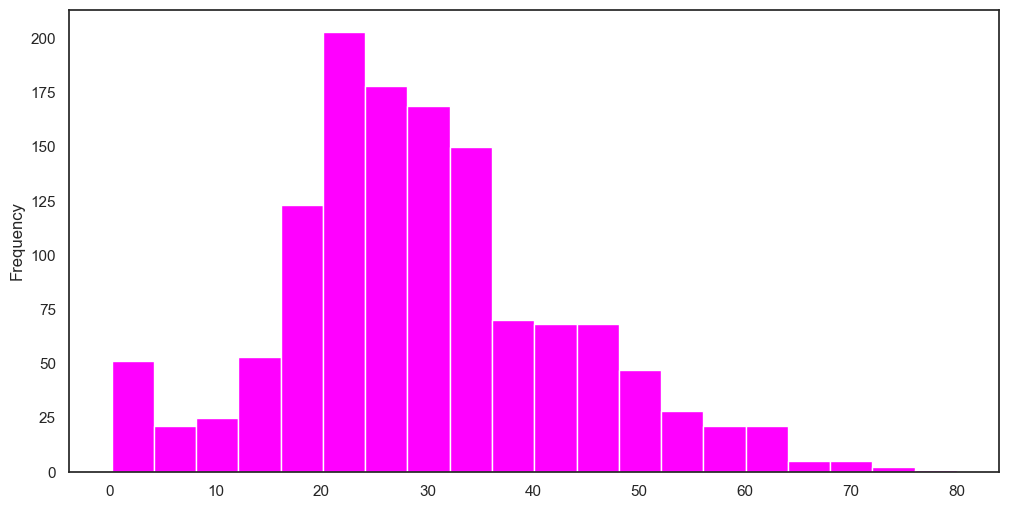

In [14]:
titanic['Age'].plot.hist(bins = 20, color = 'magenta');

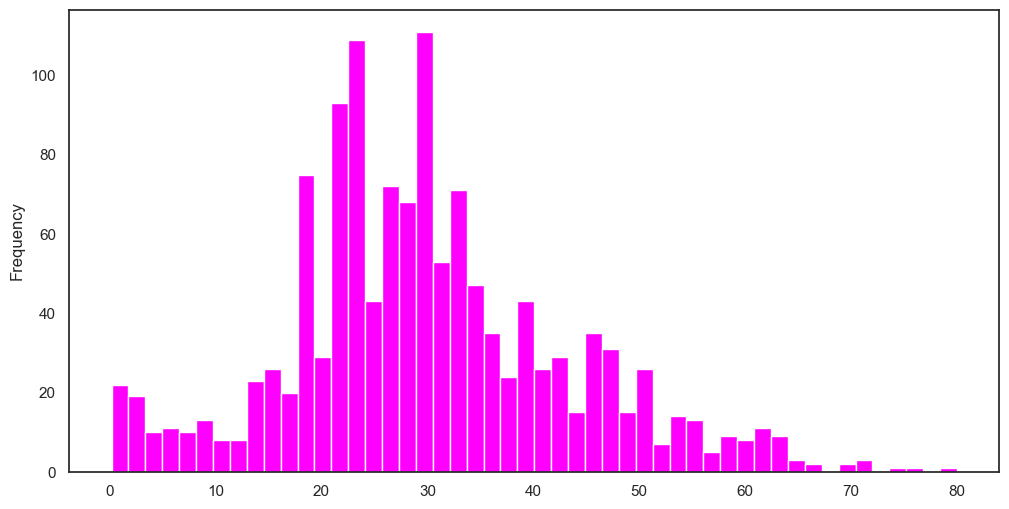

In [15]:
titanic['Age'].plot.hist(bins = 50, color = 'magenta');

#### How does the bin size affect your plot?

In [16]:
"""
Cuanto mayor es el número de columnas, mejor será la representación
de los datos. Es por esto, que cuantas más columnas la frecuencia
baja y viceversa.
"""

'\nCuanto mayor es el número de columnas, mejor será la representación\nde los datos. Es por esto, que cuantas más columnas la frecuencia\nbaja y viceversa.\n'

#### Use seaborn to show the distribution of column `Age`.

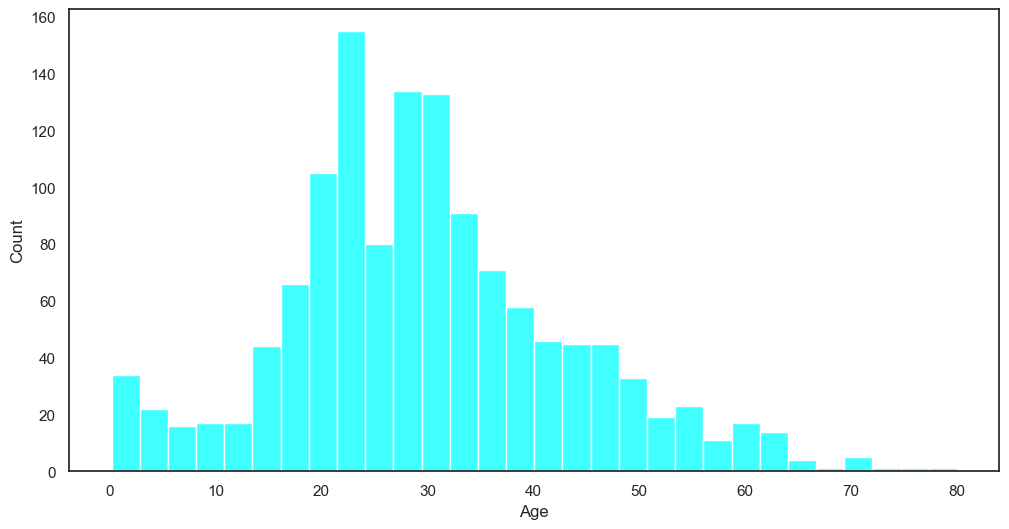

In [17]:
# your code here

sns.histplot(x = titanic.Age, color = 'cyan');

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

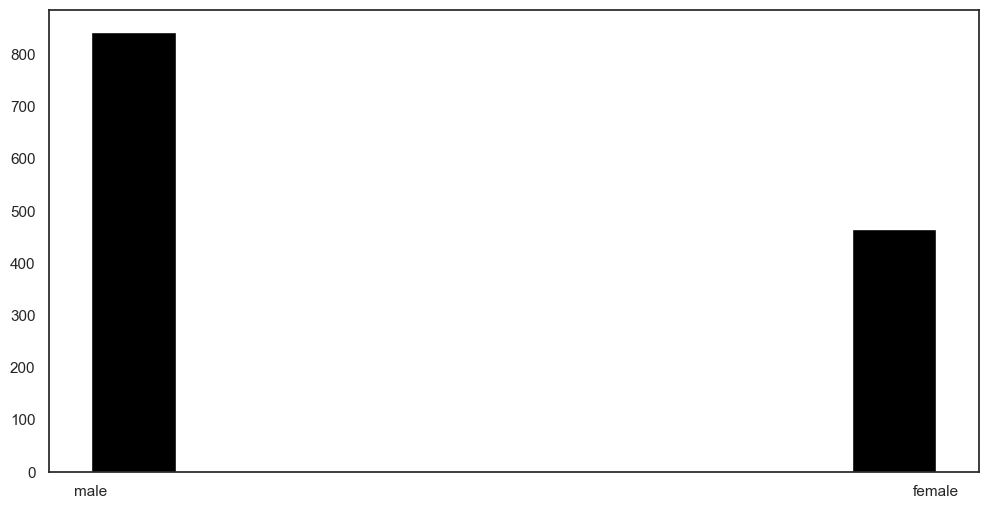

In [18]:
# Method 1 - matplotlib
# your code here

plt.hist(titanic.Gender, color = 'black');

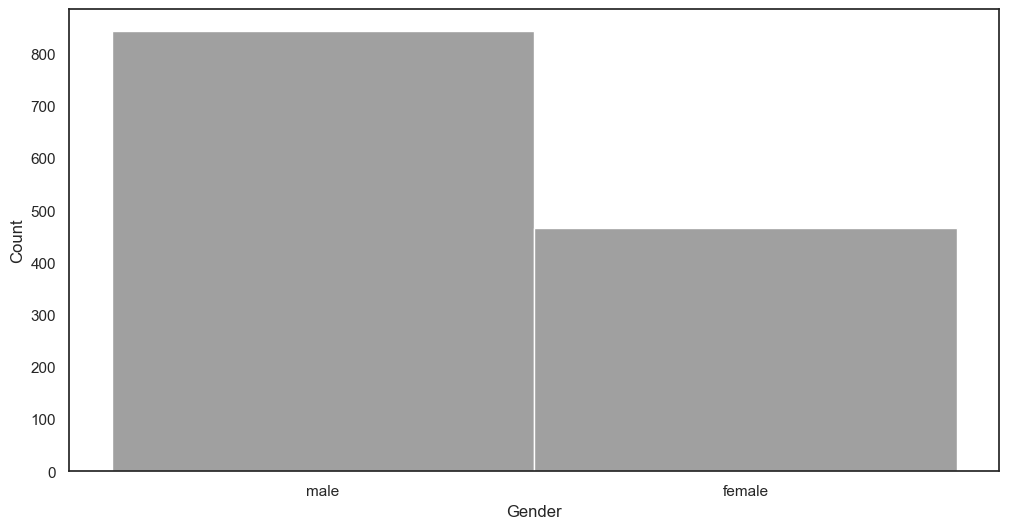

In [19]:
# Method 2 - seaborn
# your code here

sns.histplot(titanic.Gender, color = 'grey');

#### Use the right plot to visualize the column `Pclass`.

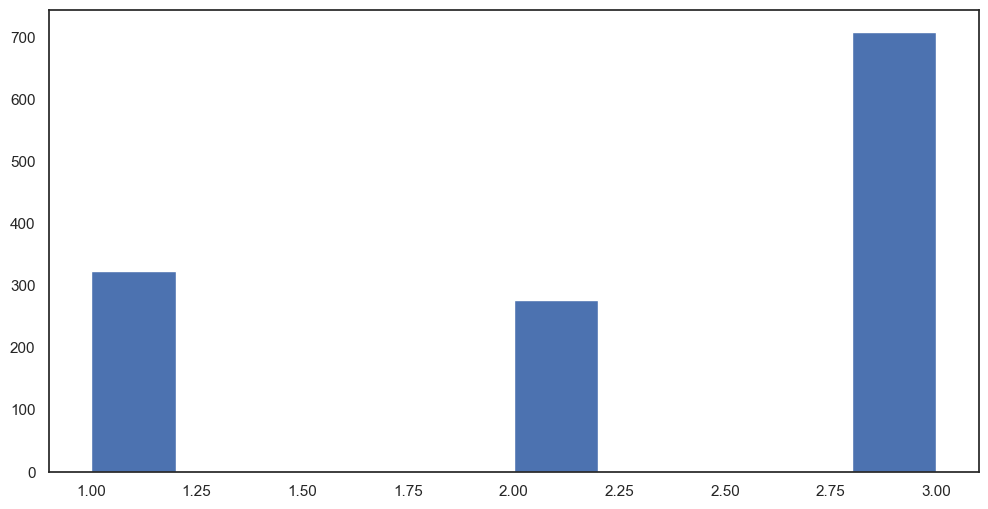

In [20]:
# your code here

plt.hist(titanic.Pclass);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

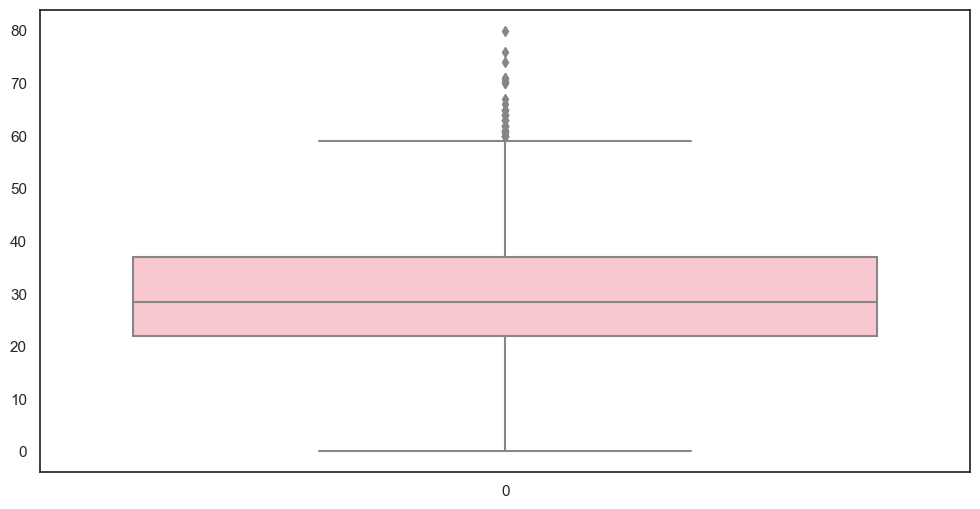

In [21]:
# your code here

sns.boxplot(data = titanic.Age, color = 'pink');

In [22]:
"""
El box plot es el que refleja de manera  gráfica las estadísticas
de un data frame. En este caso, solamente de la columna 'Age'
"""

"\nEl box plot es el que refleja de manera  gráfica las estadísticas\nde un data frame. En este caso, solamente de la columna 'Age'\n"

#### What does the last plot tell you about the feature `Age`?

In [23]:
"""
Hay bastantes outliers. 
"""

'\nHay bastantes outliers. \n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

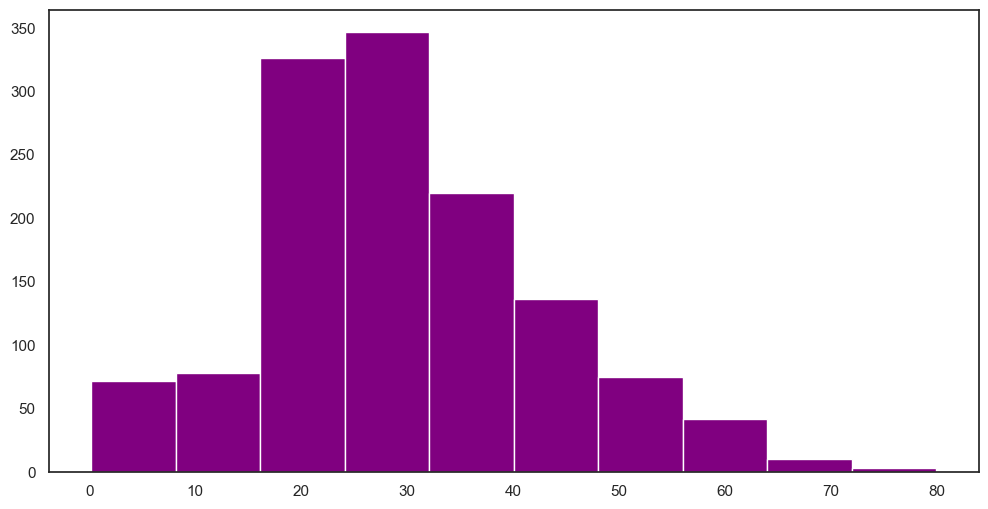

In [24]:
# your code here

plt.hist(titanic.Age, color = 'purple');

#### What additional information does the last plot provide about feature `Age`?

In [25]:
"""
Que la edad media de los pasajeros se sitúa alrededor de los 30 años.
"""

'\nQue la edad media de los pasajeros se sitúa alrededor de los 30 años.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

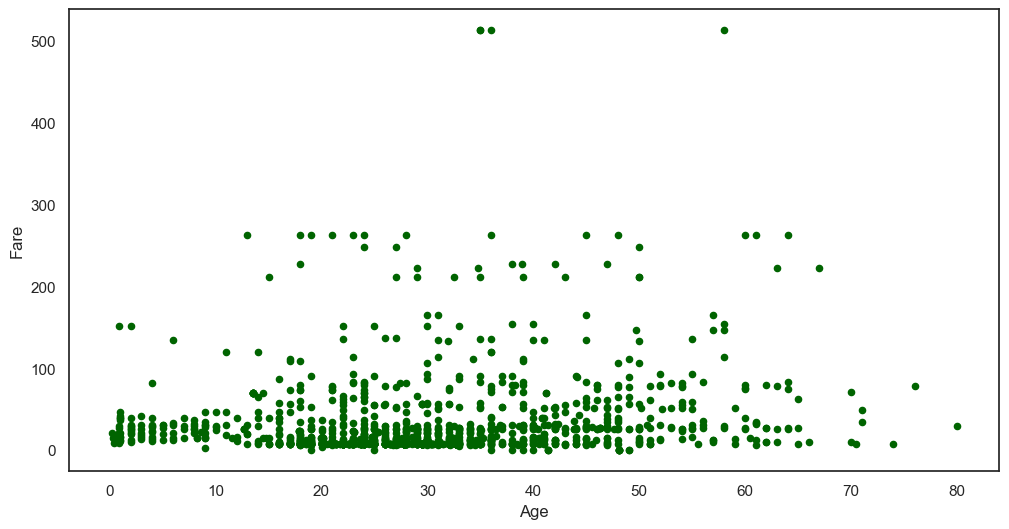

In [32]:
# Method 1 - matplotlib
# your code here

titanic.plot.scatter(x = 'Age', y = 'Fare', color = 'DarkGreen');

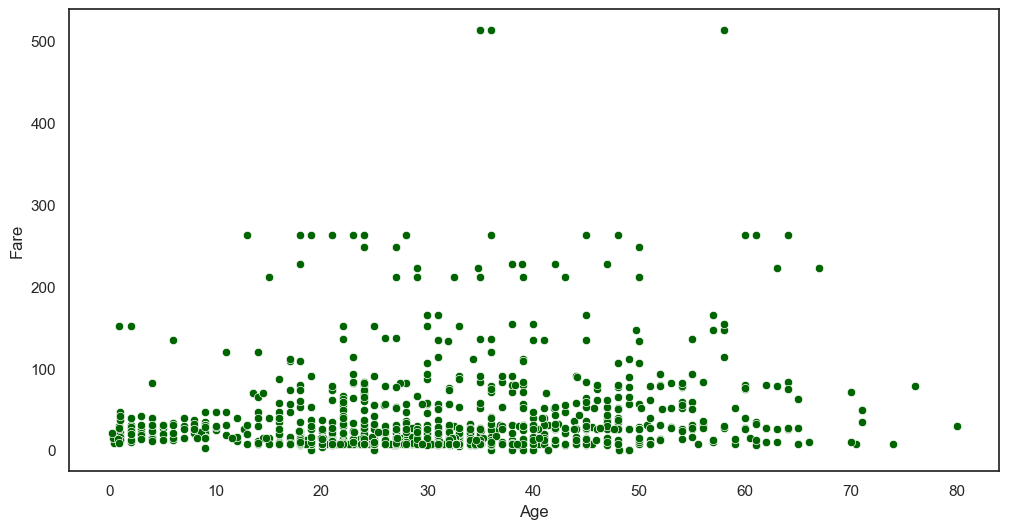

In [33]:
# Method 2 - seaborn
# your code here

sns.scatterplot(data = titanic,
                x = 'Age',
                y = 'Fare',
                color = 'DarkGreen');

#### Plot the correlation matrix using seaborn.

/var/folders/3b/jthsddxn1lq17vz466w1nbgw0000gn/T/ipykernel_1888/1946262598.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



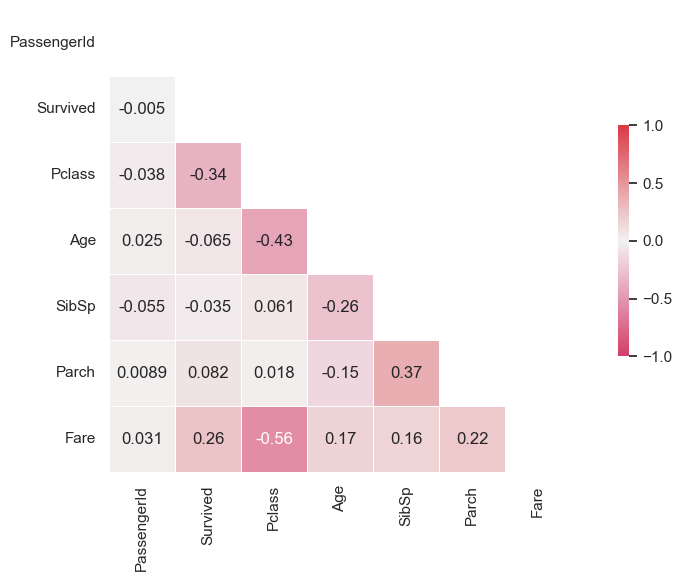

In [28]:
# your code here

corr = titanic.corr(method = 'pearson')

sns.set(style = 'white')

mascara = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(0, 10, as_cmap = True)

sns.heatmap(corr,
            mask = mascara,
            cmap = cmap,
            
            vmax = 1,
            vmin = -1,
            center = 0,
            
            square = True,
            linewidth = 0.5,
            
            cbar_kws = {'shrink': 0.5},
            annot = True);

#### What are the most correlated features?

In [29]:
"""
La clase y la tarifa, seguido de la clase y la edad.
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

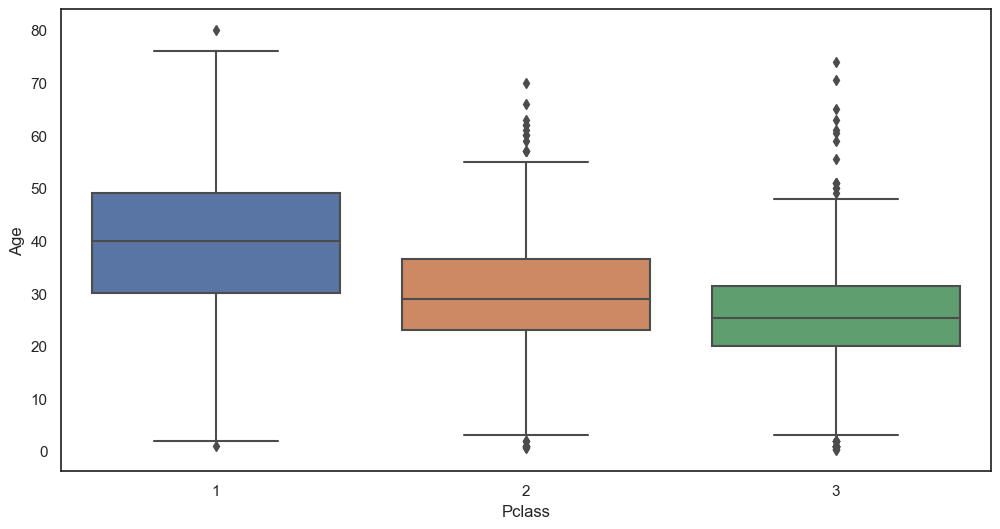

In [35]:
# your code here

sns.boxplot(x = titanic.Pclass, y = titanic.Age);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

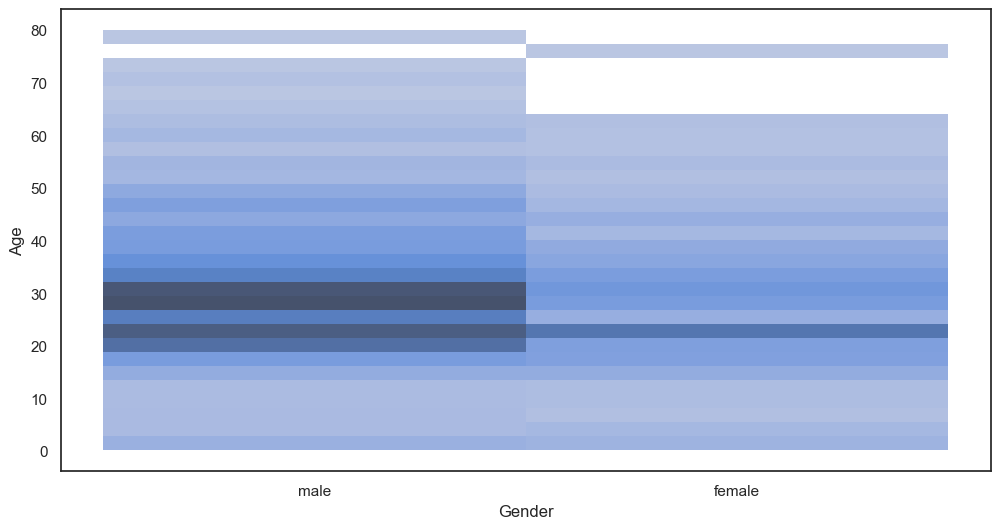

In [37]:
# your code here

sns.histplot( x = titanic.Gender, y = titanic.Age);